<a href="https://colab.research.google.com/github/seohyun34/test/blob/main/chapter05_fundamentals-of-ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**:  MNIST Ïà´Ïûê Ïù¥ÎØ∏ÏßÄ Î∂ÑÎ•ò Î¨∏Ï†úÎ•º Îî•Îü¨ÎãùÏúºÎ°ú Ìï¥Í≤∞ÌïòÎ©¥ÏÑú, Î∂àÌïÑÏöîÌïú Ï†ïÎ≥¥Í∞Ä Îì§Ïñ¥Ïò§Î©¥ Î™®Îç∏Ïù¥ Ïñ¥ÎñªÍ≤å Î∞òÏùëÌïòÎäîÏßÄÎ•º Ïã§ÌóòÌïòÎäî ÏΩîÎìú

Îëê Í∞ÄÏßÄ Í≤ΩÏö∞Î•º ÎπÑÍµê:

1. Ï†ïÏÉÅ Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞ + ÎûúÎç§Ìïú "Ïû°Ïùå Ï±ÑÎÑê" Ï∂îÍ∞Ä

2. Ï†ïÏÉÅ Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞ + Ï†ÑÎ∂Ä 0Ïù∏ "Ïì∏Î™® ÏóÜÎäî Ï±ÑÎÑê" Ï∂îÍ∞Ä

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28)) #Ïù¥ÎØ∏ÏßÄÎ•º ÌèâÌèâÌïòÍ≤å(1Ï∞®ÏõêÏúºÎ°ú) ÎßåÎì¶
train_images = train_images.astype("float32") / 255   # Ï†ïÍ∑úÌôî

# Ïû°Ïùå Ï∂îÍ∞Ä
train_images_with_noise_channels = np.concatenate( #ÏõêÎûò Ïù¥ÎØ∏ÏßÄ(784Í∞ú Ïà´Ïûê) ÏòÜÏóê ÎûúÎç§Ìïú Ïà´Ïûê 784Í∞ú Ï∂îÍ∞Ä
    [train_images, np.random.random((len(train_images), 784))], axis=1) #Ìïú Ïù¥ÎØ∏ÏßÄÍ∞Ä 784+784=1568Í∞úÏùò Ïà´ÏûêÎ°ú ÌëúÌòÑÎê®

train_images_with_zeros_channels = np.concatenate( #Ï†ÑÎ∂Ä 0Ïù∏ Ïà´Ïûê 784Í∞ú Ï∂îÍ∞Ä
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 0us/step


**Training the same model on MNIST data with noise channels or all-zero channels**: Î™®Îç∏ Ï†ïÏùò

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2) #20% Îç∞Ïù¥ÌÑ∞Î•º Í≤ÄÏ¶ùÏö©ÏúºÎ°ú Îî∞Î°ú ÎñºÎë†

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 8ms/step - accuracy: 0.6946 - loss: 1.0649 - val_accuracy: 0.8975 - val_loss: 0.3291
Epoch 2/10
375/375 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 3ms/step - accuracy: 0.9100 - loss: 0.2935 - val_accuracy: 0.9312 - val_loss: 0.2209
Epoch 3/10
375/375 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.9421 - loss: 0.1874 - val_accuracy: 0.9487 - val_loss: 0.1738
Epoch 4/10
375/375 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.9595 - loss: 0.1313 - val_accuracy: 0.9488 - val_loss: 0.1788
Epoch 5/10
375/375 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.9703 - loss: 0.0967 - val_accuracy: 0.9638 - val_loss: 0.1212
Epoch 6/10
375/375 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 4ms/step - accuracy: 0.9793 - loss: 0.0653 - val_accuracy: 0.9614 - val_loss:

**Plotting a validation accuracy comparison** Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ ÏãúÍ∞ÅÌôî

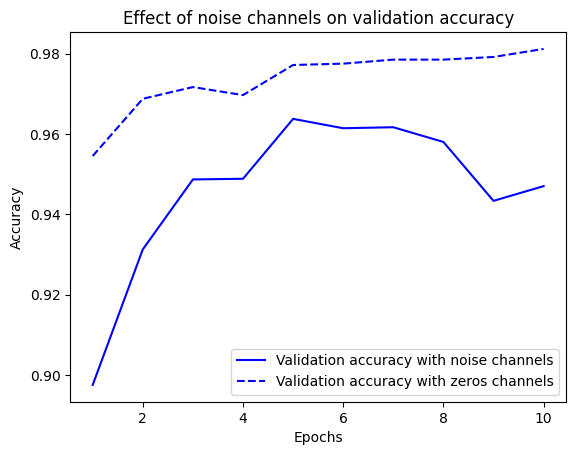

In [ ]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
# Ìï¥ÏÑù: Ïû°Ïùå Ï±ÑÎÑêO - Ï†ïÌôïÎèÑÍ∞Ä Îçî ÎÇÆÍ≥† Î∂àÏïàÏ†ï / 0 Ï±ÑÎÑê- Ï†ïÌôïÎèÑÍ∞Ä Îçî ÎÜíÍ≥† ÏïàÏ†ïÏ†Å
#-> Îî•Îü¨Îãù Î™®Îç∏Ïù¥ Ïû°ÏùåÍ∞ôÏùÄ Ïì∏Î™®ÏóÜÎäî Ï†ïÎ≥¥Ïóê ÏòÅÌñ• Î∞õÏùÑ Ïàò ÏûàÏùå

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**: Î†àÏù¥Î∏î(Ï†ïÎãµ)ÏùÑ Î¨¥ÏûëÏúÑÎ°ú ÏÑûÏóàÏùÑ ÎïåÎèÑ ÌïôÏäµÌï† Ïàò ÏûàÎäîÏßÄ Ïã§Ìóò

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels) # Î†àÏù¥Î∏î ÏÑûÏùå

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)
# Í≤∞Í≥º- accuracy: Ï†êÏ†ê Ïò¨ÎùºÍ∞ê/ val_accuracy: 10% Í∑ºÏ≤òÏóêÏÑú Í≥ÑÏÜç Ï†ïÏ≤¥ (ÎûúÎç§ ÏòàÏ∏°Í≥º Í∞ôÏùå)/ val_loss: Í≥ÑÏÜç Ï¶ùÍ∞Ä

Epoch 1/100
375/375 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 5ms/step - accuracy: 0.1049 - loss: 2.3341 - val_accuracy: 0.1014 - val_loss: 2.3072
Epoch 2/100
375/375 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.1165 - loss: 2.2987 - val_accuracy: 0.1037 - val_loss: 2.3082
Epoch 3/100
375/375 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.1286 - loss: 2.2895 - val_accuracy: 0.1068 - val_loss: 2.3182
Epoch 4/100
375/375 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.1406 - loss: 2.2774 - val_accuracy: 0.1042 - val_loss: 2.3252
Epoch 5/100
375/375 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.1600 - loss: 2.2578 - val_accuracy: 0.1058 - val_loss: 2.3374
Epoch 6/100
375/375 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.1690 - loss: 2.2385 - val_accuracy: 0.0998 - val

üí° Ïã§ÌóòÏù¥ ÎßêÌïòÎäî Í≤É
1. Ïã†Í≤ΩÎßùÏùÄ Î¨¥ÏûëÏúÑ Îç∞Ïù¥ÌÑ∞ÎèÑ Ïô∏Ïö∏ Ïàò ÏûàÎã§:
ÌïôÏäµ Ï†ïÌôïÎèÑ(accuracy)Í∞Ä 0.7 Ïù¥ÏÉÅÍπåÏßÄ Ï¶ùÍ∞ÄÌïú Í≤ÉÏùÄ Î™®Îç∏Ïù¥ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò Ìå®ÌÑ¥ÏùÑ ÌïôÏäµÌïú Í≤ÉÏ≤òÎüº Î≥¥Ïù¥ÏßÄÎßå, ÏÇ¨Ïã§ÏùÄ Îã®ÏàúÌûà ÌõàÎ†® ÏÉòÌîå ÌïòÎÇòÌïòÎÇòÎ•º Ïô∏Ïö¥ Í≤ÉÏûÖÎãàÎã§.

Ï¶â, ÏûÖÎ†• Ïù¥ÎØ∏ÏßÄÏôÄ ÏïÑÎ¨¥ ÏÉÅÍ¥ÄÏóÜÎäî Ï†ïÎãµÏùÑ ÎßûÏ∂îÎäî Î≤ïÏùÑ 'Ïô∏ÏõåÏÑú' Ïûò ÏòàÏ∏°ÌïòÍ≥† ÏûàÎäî Í≤ÉÎøêÏù¥ÏóêÏöî.

2. ÌïòÏßÄÎßå ÏùºÎ∞òÌôîÎäî Ï†ÑÌòÄ Ïïà ÎêúÎã§:
Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Îäî ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞Ïù¥ÎØÄÎ°ú, Ïô∏Ïö¥ Ï†ïÎãµÏù¥ ÌÜµÌïòÏßÄ ÏïäÏäµÎãàÎã§.

Í≤ÄÏ¶ù Ï†ïÌôïÎèÑÍ∞Ä 10% ÏàòÏ§ÄÏù∏ Ïù¥Ïú†Îäî 10Í∞úÏùò ÌÅ¥ÎûòÏä§Î•º Î¨¥ÏûëÏúÑÎ°ú Ï∞çÏóàÏùÑ ÎïåÏùò Í∏∞ÎåÄÍ∞íÏù¥Í∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§.

3. ÏÜêÏã§ Í∞í(loss)Ïù¥ Ï¶ùÍ∞ÄÌïòÎäî Ïù¥Ïú†:
Î™®Îç∏ÏùÄ Ï†êÏ†ê ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïóê Í≥ºÏ†ÅÌï©(overfitting)ÎêòÍ≥† ÏûàÍ≥†, Ïù¥Î°ú Ïù∏Ìï¥ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ÏÑúÎäî ÏòàÏ∏°Ïù¥ Îçî ÏóâÎßùÏù¥ ÎêòÍ∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§.

softmax Í≤∞Í≥ºÍ∞Ä Ï†êÏ†ê Îçî ÌôïÏã†(confident) ÏûàÍ≤å ÎÇòÏò§ÏßÄÎßå, ÌãÄÎ¶∞ ÎãµÏùÑ ÌôïÏã†ÌïòÍ≤å ÎêòÎ©¥ÏÑú lossÍ∞Ä Ïª§Ï†∏Ïöî.



11490434/11490434 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 0us/step


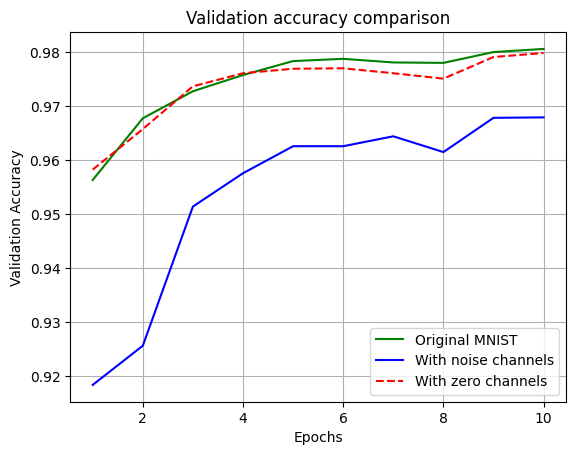

In [1]:
# - From Training the same model on MNIST data with noise channels or all-zero channels  Add validation accuracy of original data for mnist data. (ÏõêÎ≥∏ MNIST Îç∞Ïù¥ÌÑ∞ÎßåÏúºÎ°ú ÌïôÏäµÌïú Í≤ΩÏö∞Ïùò ÏÑ±Îä•Í≥º ÎÖ∏Ïù¥Ï¶à Ï±ÑÎÑê /0ÏúºÎ°ú Ï±ÑÏö¥ Ï±ÑÎÑê Ï∂îÍ∞ÄÌïú Í≤ΩÏö∞Ïùò Î™®Îç∏ ÏÑ±Îä•ÏùÑ ÎπÑÍµê)
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Í≥µÌÜµ Î™®Îç∏ ÏÉùÏÑ± Ìï®Ïàò
def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28)).astype("float32") / 255

# 2. Ïû°Ïùå Ï±ÑÎÑê / 0 Ï±ÑÎÑê Ï∂îÍ∞Ä
noise_channels = np.random.random((len(train_images), 784))     # ÎûúÎç§ Ï±ÑÎÑê
zero_channels = np.zeros((len(train_images), 784))              # 0 Ï±ÑÎÑê

train_images_noise = np.concatenate([train_images, noise_channels], axis=1)
train_images_zeros = np.concatenate([train_images, zero_channels], axis=1)

# 3. ÏõêÎ≥∏ ÌïôÏäµ
model = get_model()
history_original = model.fit(
    train_images, train_labels,
    epochs=10, batch_size=128,
    validation_split=0.2,
    verbose=0)

# 4. ÎÖ∏Ïù¥Ï¶à Ï±ÑÎÑê ÌïôÏäµ
model = get_model()
history_noise = model.fit(
    train_images_noise, train_labels,
    epochs=10, batch_size=128,
    validation_split=0.2,
    verbose=0)

# 5. Ï†úÎ°ú Ï±ÑÎÑê ÌïôÏäµ
model = get_model()
history_zeros = model.fit(
    train_images_zeros, train_labels,
    epochs=10, batch_size=128,
    validation_split=0.2,
    verbose=0)

# 6. Í≤∞Í≥º ÏãúÍ∞ÅÌôî
epochs = range(1, 11)
plt.plot(epochs, history_original.history['val_accuracy'], 'g-', label='Original MNIST')
plt.plot(epochs, history_noise.history['val_accuracy'], 'b-', label='With noise channels')
plt.plot(epochs, history_zeros.history['val_accuracy'], 'r--', label='With zero channels')
plt.title("Validation accuracy comparison")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid()
plt.show()
# ÏõêÎ≥∏ MNIST (784Ï∞®Ïõê): Ï†ïÏÉÅÏ†ÅÏù∏ Îç∞Ïù¥ÌÑ∞
# ÎÖ∏Ïù¥Ï¶à Ï±ÑÎÑê Ï∂îÍ∞Ä (784+784=1568Ï∞®Ïõê): Î¨¥ÏûëÏúÑ Ïà´ÏûêÎì§Ïù¥ Î™®Îç∏Ïùò ÏùºÎ∞òÌôî ÏÑ±Îä•ÏùÑ Î∞©Ìï¥Ìï† Ïàò ÏûàÏùå
# 0 Ï±ÑÎÑê Ï∂îÍ∞Ä: Ï†ïÎ≥¥Í∞Ä ÏóÜÎäî Í∞íÏù¥Í∏∞ ÎïåÎ¨∏Ïóê ÏòÅÌñ•Ïù¥ Í±∞Ïùò ÏóÜÏùÑ ÏàòÎèÑ ÏûàÏùå

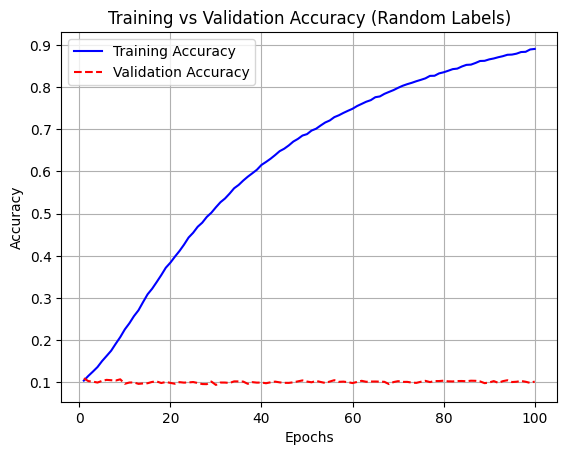

In [2]:
# - Fitting a MNIST model with randomly shuffled labels.  Visualize training accuracy and validation accuracy? (ÎûúÎç§ Î†àÏù¥Î∏î ÌïôÏäµ ÌõÑ ÌõàÎ†® Ï†ïÌôïÎèÑÏôÄ Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ ÏãúÍ∞ÅÌôî)
# Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28)).astype("float32") / 255

# ÎùºÎ≤® Î¨¥ÏûëÏúÑ ÏÑûÍ∏∞
random_train_labels = train_labels.copy()
np.random.shuffle(random_train_labels)

# Î™®Îç∏ Ï†ïÏùò Î∞è ÌïôÏäµ
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history_random_labels = model.fit(
    train_images, random_train_labels,
    epochs=100, batch_size=128,
    validation_split=0.2,
    verbose=0
)

# Ï†ïÌôïÎèÑ ÏãúÍ∞ÅÌôî
epochs = range(1, 101)
plt.plot(epochs, history_random_labels.history['accuracy'], 'b-', label='Training Accuracy')
plt.plot(epochs, history_random_labels.history['val_accuracy'], 'r--', label='Validation Accuracy')
plt.title("Training vs Validation Accuracy (Random Labels)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()
# training accuracyÎäî Ï†êÏ†ê Ïò¨ÎùºÍ∞ÄÏßÄÎßå, val accuracyÎäî Î¨¥ÏûëÏúÑÏù¥Í∏∞ ÎïåÎ¨∏Ïóê Ïò¨ÎùºÍ∞ÄÏßÄX ‚Üí ÏùºÎ∞òÌôî Îä•Î†• ÏóÜÏùå. Î™®Îç∏ÏùÄ Îã®ÏàúÌûà Îç∞Ïù¥ÌÑ∞Î•º Ïô∏ÏõåÏÑú ÌïôÏäµÌï®‚Üí Í≥ºÏ†ÅÌï©

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**ÌïôÏäµÎ•†Ïù¥ ÎÑàÎ¨¥ ÌÅ¥ Îïå/Ï†ÅÏ†à**Ìï† Îïå Í≤∞Í≥ºÍ∞Ä Ïñ¥ÎñªÍ≤å Îã§Î•∏ÏßÄ Îëê Í∞úÏùò Î™®Îç∏Î°ú ÎπÑÍµê

**Training a MNIST model with an incorrectly high learning rate**

In [ ]:
(train_images, train_labels), _ = mnist.load_data() #_: ÌÖåÏä§Ìä∏ÏÖãÏùÄ ÏßÄÍ∏à ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÏúºÎØÄÎ°ú Î¨¥Ïãú
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.), # ÌïôÏäµÎ•†Ïù¥ ÎÑàÎ¨¥ ÌÅ∞ 1.0ÏùÑ ÏÇ¨Ïö©
              loss="sparse_categorical_crossentropy", # Ï†ïÎãµÏù¥ 0~9 Ï†ïÏàòÏù∏ Í≤ΩÏö∞ ÏÇ¨Ïö©ÌïòÎäî ÏÜêÏã§ Ìï®Ïàò
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)
#Ï≤´ Î≤àÏß∏ ÏóêÌè≠ÏóêÏÑú lossÍ∞Ä 3000 Ïù¥ÏÉÅ! ÎπÑÏ†ïÏÉÅÏ†ÅÏù∏ ÏàòÏπò > ÌïôÏäµÎ•†Ïù¥ ÎÑàÎ¨¥ Ïª§ÏÑú Î™®Îç∏Ïù¥ Î∞úÏÇ∞
# accuracyÏôÄ val_accuracy Îß§Ïö∞ ÎÇÆÏùå

Epoch 1/10
375/375 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 4ms/step - accuracy: 0.4241 - loss: 3002.3223 - val_accuracy: 0.1806 - val_loss: 2.3605
Epoch 2/10
375/375 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 3ms/step - accuracy: 0.1612 - loss: 2.6075 - val_accuracy: 0.1648 - val_loss: 2.2693
Epoch 3/10
375/375 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.1456 - loss: 2.5069 - val_accuracy: 0.1489 - val_loss: 2.2874
Epoch 4/10
375/375 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.1370 - loss: 2.4229 - val_accuracy: 0.1392 - val_loss: 2.3388
Epoch 5/10
375/375 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.1460 - loss: 2.5348 - val_accuracy: 0.1653 - val_loss: 2.4115
Epoch 6/10
375/375 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.1438 - loss: 2.3922 - val_accuracy: 0.1700 - val_lo

**The same model with a more appropriate learning rate**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2), # 1e-2: ÌïôÏäµÎ•† Ï†ÅÏ†àÌûà ÏûëÏïÑÏßê
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)
# Ï†ïÌôïÎèÑÍ∞Ä Îß§Ïö∞ ÎÜíÍ≥† ÏïàÏ†ïÏ†Å
#val_lossÏùÄ ÏóêÌè≠ 2 Ïù¥ÌõÑÎ∂ÄÌÑ∞Îäî Îã§ÏÜå Ï¶ùÍ∞Ä‚Üí Í≥ºÏ†ÅÌï© Í∞ÄÎä•ÏÑ±ÎèÑ ÏÇ¥Ïßù Î≥¥ÏûÑ

Epoch 1/10
375/375 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 4ms/step - accuracy: 0.8329 - loss: 0.9460 - val_accuracy: 0.9618 - val_loss: 0.1433
Epoch 2/10
375/375 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.9648 - loss: 0.1259 - val_accuracy: 0.9688 - val_loss: 0.1192
Epoch 3/10
375/375 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.9747 - loss: 0.0942 - val_accuracy: 0.9666 - val_loss: 0.1520
Epoch 4/10
375/375 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.9799 - loss: 0.0803 - val_accuracy: 0.9665 - val_loss: 0.1729
Epoch 5/10
375/375 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 4ms/step - accuracy: 0.9834 - loss: 0.0662 - val_accuracy: 0.9690 - val_loss: 0.1646
Epoch 6/10
375/375 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 3ms/step - accuracy: 0.9856 - loss: 0.0562 - val_accuracy: 0.9588 - val_loss:

### Leveraging better architecture priors

### Increasing model capacity
: Îî•Îü¨Îãù Î™®Îç∏Ïùò Íµ¨Ï°∞(Î™®Îç∏ Ïö©Îüâ= capacity)Í∞Ä ÏÑ±Îä•Ïóê Ïñ¥Îñ§ ÏòÅÌñ•ÏùÑ Ï£ºÎäîÏßÄ ÎπÑÍµêÌïòÎäî Ïã§Ìóò

**A simple logistic regression on MNIST**

In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")]) # Ï∂úÎ†•Ï∏µ ÌïòÎÇòÎßå ÏûàÎäî Î™®Îç∏
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)
# Í¥úÏ∞ÆÏùÄ ÏÑ±Îä•Ïù¥ÏßÄÎßå, Î™®Îç∏Ïù¥ Îã®ÏàúÌï¥ÏÑú ÏÑ±Îä• Ìñ•ÏÉÅÏù¥ Ï†êÏ†ê ÎëîÌôî-> capacityÍ∞Ä Î∂ÄÏ°±Ìï®

Epoch 1/20
375/375 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 6ms/step - accuracy: 0.7299 - loss: 1.0542 - val_accuracy: 0.8984 - val_loss: 0.3648
Epoch 2/20
375/375 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 4ms/step - accuracy: 0.8996 - loss: 0.3670 - val_accuracy: 0.9134 - val_loss: 0.3108
Epoch 3/20
375/375 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.9098 - loss: 0.3243 - val_accuracy: 0.9183 - val_loss: 0.2941
Epoch 4/20
375/375 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.9158 - loss: 0.3058 - val_accuracy: 0.9203 - val_loss: 0.2840
Epoch 5/20
375/375 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.9170 - loss: 0.2947 - val_accuracy: 0.9240 - val_loss: 0.2784
Epoch 6/20
375/375 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.9188 - loss: 0.2851 - val_accuracy: 0.9242 - val_loss:

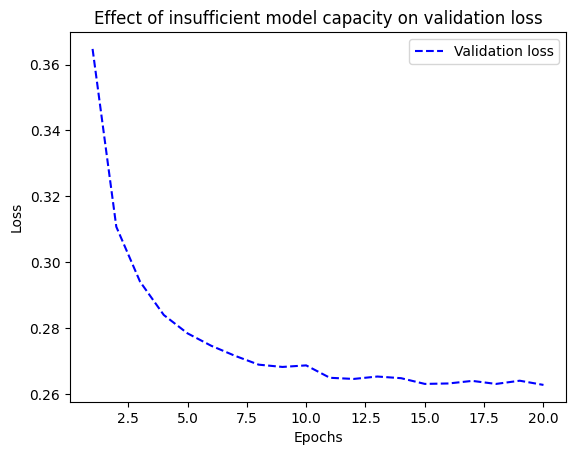

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"] # Í∞Å ÏóêÌè≠ÎßàÎã§Ïùò val_loss Í∏∞Î°ù Í∞ÄÏ†∏Ïò¥
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
# Í≤∞Í≥º: ÌïôÏäµÌïòÎ©¥ÏÑú ÏÜêÏã§Ïù¥ Ï§ÑÏñ¥Îì§Îã§Í∞Ä ÏÑ±Îä•Ïù¥ Ï†ïÏ≤¥Îê®. Î≥µÏû°Ìïú Ìå®ÌÑ¥ÏùÑ Ïûò Î™ª Ïû°ÎäîÎã§Îäî Îúª

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax")]) # ÌÅ∞ Î™®Îç∏: Îëê Í∞úÏùò ÏùÄÎãâÏ∏µ Ìè¨Ìï®
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)
#Epoch 1: train acc 81.93%, val acc 94.56% ‚Üí Ï≤´ ÏóêÌè≠Î∂ÄÌÑ∞ ÎÜíÏùÄ Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ.
# Epoch 10 Ïù¥ÌõÑÎ∂ÄÌÑ∞: accuracy Í±∞Ïùò 99.8%ÍπåÏßÄ Ïò¨ÎùºÍ∞ê. Í∑∏Îü¨ÎÇò Í≤ÄÏ¶ù ÏÑ±Îä•ÏùÄ Ï†ïÏ≤¥ ÎòêÎäî ÌïòÎùΩ ‚Üí val_loss Ï¶ùÍ∞Ä!
# ‚Üí Í≥ºÏ†ÅÌï©Ïù¥ ÏãúÏûëÎêòÏóàÏùåÏùÑ ÏùòÎØ∏‚Üí Î™®Îç∏Ïù¥ ÎÑàÎ¨¥ Î≥µÏû°Ìï¥ÏÑú ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïóê Í≥ºÌïòÍ≤å ÎßûÏ∂∞Ïßê.

Epoch 1/20
375/375 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 6ms/step - accuracy: 0.8193 - loss: 0.6395 - val_accuracy: 0.9456 - val_loss: 0.1906
Epoch 2/20
375/375 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.9468 - loss: 0.1787 - val_accuracy: 0.9521 - val_loss: 0.1580
Epoch 3/20
375/375 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.9644 - loss: 0.1209 - val_accuracy: 0.9662 - val_loss: 0.1147
Epoch 4/20
375/375 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.9734 - loss: 0.0893 - val_accuracy: 0.9678 - val_loss: 0.1069
Epoch 5/20
375/375 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.9797 - loss: 0.0684 - val_accuracy: 0.9687 - val_loss: 0.1076
Epoch 6/20
375/375 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 4ms/step - accuracy: 0.9829 - loss: 0.0571 - val_accuracy: 0.9721 - val_loss:

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

üîç ÌäπÏßï ÏöîÏïΩ

Í∏∞Î≥∏ Î™®Îç∏: validation accuracyÍ∞Ä 5-6 epoch Ïù¥ÌõÑ Í∞êÏÜåÌïòÍ∏∞ ÏãúÏûëÌñàÏñ¥Ïöî ‚Üí Í≥ºÏ†ÅÌï©Ïù¥ ÏãúÏûëÎêú ÏãúÏ†ê.

Ï∂ïÏÜåÎêú Î™®Îç∏: validation ÏÑ±Îä•Ïù¥ Îçî Ïò§Îûò Ïú†ÏßÄÎê® ‚Üí Î™®Îç∏ Ïö©Îüâ Ï∂ïÏÜåÎäî Í≥ºÏ†ÅÌï© ÏôÑÌôîÏóê ÎèÑÏõÄÎê®.

ÌôïÏû•Îêú Î™®Îç∏: ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïóê ÎÑàÎ¨¥ Ïûò ÎßûÏïÑÎ≤ÑÎ†§ÏÑú validation ÏÑ±Îä•Ïù¥ Îπ†Î•¥Í≤å Îñ®Ïñ¥Ï†∏Ïöî ‚Üí Ïã¨Ìïú Í≥ºÏ†ÅÌï©.

**Original model**

In [6]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)
#(train_data, train_labels), (test_data, test_labels) < ÏõêÎûò Ïù¥Î†áÍ≤å Ïì∞ÎäîÎç∞ test_data ÏïàÏîÄ

def vectorize_sequences(sequences, dimension=10000): #Îç∞Ïù¥ÌÑ∞ Î≤°ÌÑ∞Ìôî (Ï†ïÏàò Î¶¨Ïä§Ìä∏‚Üí Î≤°ÌÑ∞)
    results = np.zeros((len(sequences), dimension))  #ÏõêÌï´Ïù∏ÏΩîÎî©
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.     # Î¶¨Ïä§Ìä∏ ÏïàÏùò Ï†ïÏàòÎì§ÏùÑ Ìï¥Îãπ ÏúÑÏπòÏóê 1Î°ú ÏÑ§Ï†ï
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid") #Ïù¥ÏßÑ Î∂ÑÎ•òÏóêÏÑú ÏûêÏ£º ÏÇ¨Ïö©
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)
# validation accuracyÍ∞Ä 5-6 epoch Ïù¥ÌõÑ Í∞êÏÜåÌïòÍ∏∞ ÏãúÏûë ‚Üí Í≥ºÏ†ÅÌï©Ïù¥ ÏãúÏûëÎêú ÏãúÏ†ê.

17464789/17464789 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 0us/step
Epoch 1/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 89ms/step - accuracy: 0.6864 - loss: 0.6092 - val_accuracy: 0.8719 - val_loss: 0.4004
Epoch 2/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 33ms/step - accuracy: 0.8875 - loss: 0.3514 - val_accuracy: 0.8702 - val_loss: 0.3384
Epoch 3/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 21ms/step - accuracy: 0.9285 - loss: 0.2504 - val_accuracy: 0.8916 - val_loss: 0.2839
Epoch 4/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 25ms/step - accuracy: 0.9395 - loss: 0.1985 - val_accuracy: 0.8890 - val_loss: 0.2772
Epoch 5/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 22ms/step - accuracy: 0.9488 - loss: 0.1649 - val_accuracy: 0.8868 - val_loss: 0.2813
Epoch 6/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

**Version of the model with lower capacity**: validation ÏÑ±Îä•Ïù¥ Îçî Ïò§Îûò Ïú†ÏßÄÎê® ‚Üí Î™®Îç∏ Ïö©Îüâ Ï∂ïÏÜåÎäî Í≥ºÏ†ÅÌï© ÏôÑÌôîÏóê ÎèÑÏõÄÎê®.

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"), # Îâ¥Îü∞ Ïàò Ï§ÑÏûÑ
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 109ms/step - accuracy: 0.6895 - loss: 0.6196 - val_accuracy: 0.8519 - val_loss: 0.4758
Epoch 2/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 24ms/step - accuracy: 0.8813 - loss: 0.4237 - val_accuracy: 0.8677 - val_loss: 0.3857
Epoch 3/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 25ms/step - accuracy: 0.9091 - loss: 0.3310 - val_accuracy: 0.8836 - val_loss: 0.3344
Epoch 4/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 26ms/step - accuracy: 0.9238 - loss: 0.2731 - val_accuracy: 0.8882 - val_loss: 0.3062
Epoch 5/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 23ms/step - accuracy: 0.9325 - loss: 0.2330 - val_accuracy: 0.8857 - val_loss: 0.2944
Epoch 6/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 24ms/step - accuracy: 0.9380 - loss: 0.2010 - val_accuracy: 0.8920 - val_loss: 0.27

**Version of the model with higher capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"), #Îâ¥Îü∞ Í∞úÎßéÏïÑÏßê
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 119ms/step - accuracy: 0.6652 - loss: 0.6596 - val_accuracy: 0.8608 - val_loss: 0.3600
Epoch 2/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 26ms/step - accuracy: 0.8682 - loss: 0.3253 - val_accuracy: 0.8552 - val_loss: 0.3411
Epoch 3/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 41ms/step - accuracy: 0.8956 - loss: 0.2489 - val_accuracy: 0.8841 - val_loss: 0.2769
Epoch 4/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 46ms/step - accuracy: 0.9371 - loss: 0.1673 - val_accuracy: 0.8923 - val_loss: 0.2685
Epoch 5/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 29ms/step - accuracy: 0.9634 - loss: 0.1094 - val_accuracy: 0.8851 - val_loss: 0.2949
Epoch 6/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 29ms/step - accuracy: 0.9734 - loss: 0.0883 - val_accuracy: 0.8301 - val_loss: 0.55

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [ ]:
from tensorflow.keras import regularizers #regularizers: Í∞ÄÏ§ëÏπòÏóê Ìå®ÎÑêÌã∞Î•º Î∂ÄÏó¨ÌïòÎäî Ìï®ÏàòÎì§Ïù¥ Îì§Ïñ¥ÏûàÎäî Î™®Îìà
model = keras.Sequential([                #Í∞ÄÏ§ëÏπòÍ∞Ä ÎÑàÎ¨¥ Ïª§ÏßÄÏßÄ ÏïäÎèÑÎ°ù Ï†úÏïΩÏ§å- overfitting Î∞©ÏßÄ
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002), # L2 Ï†ïÍ∑úÌôî. 0.002: Ï†ïÍ∑úÌôî Í∞ïÎèÑ. ÌÅ¥ÏàòÎ°ù Ï†úÏïΩÏù¥ ÏÑ∏Ïßê
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid") # sigmoid: 0~1 ÏÇ¨Ïù¥Ïùò Í∞íÏùÑ Ï∂úÎ†•-> Í∏çÏ†ï Î¶¨Î∑∞Ïùº ÌôïÎ•† ÏòàÏ∏°
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy", # Ïù¥ÏßÑ Î∂ÑÎ•ò
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

# Í≤∞Í≥º:
#Epoch 5: Ï†ïÌôïÎèÑ 93%, ÏÜêÏã§ 0.27 ‚Üí Ïûò ÌïôÏäµÎêòÍ≥† ÏûàÏùå. Í≤ÄÏ¶ù Ï†ïÌôïÎèÑÎèÑ 88% ‚Üí ÏÑ±Îä• Ï¢ãÏùå!
#Epoch 15~20- Ï†ïÌôïÎèÑÎäî Í≥ÑÏÜç ÎÜíÏïÑÏßÄÏßÄÎßå val_lossÎäî Ïò§ÌûàÎ†§ Ï¶ùÍ∞Ä‚Üí Í≥ºÏ†ÅÌï© Ïã†Ìò∏

Epoch 1/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 132ms/step - accuracy: 0.6767 - loss: 0.6987 - val_accuracy: 0.8211 - val_loss: 0.5129
Epoch 2/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 24ms/step - accuracy: 0.8830 - loss: 0.4387 - val_accuracy: 0.8653 - val_loss: 0.4182
Epoch 3/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 25ms/step - accuracy: 0.9137 - loss: 0.3443 - val_accuracy: 0.8772 - val_loss: 0.3810
Epoch 4/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 23ms/step - accuracy: 0.9321 - loss: 0.2948 - val_accuracy: 0.8791 - val_loss: 0.3725
Epoch 5/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 24ms/step - accuracy: 0.9330 - loss: 0.2750 - val_accuracy: 0.8854 - val_loss: 0.3572
Epoch 6/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 24ms/step - accuracy: 0.9412 - loss: 0.2550 - val_accuracy: 0.8658 - val_loss: 0.40

**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout- ÎìúÎ°≠ÏïÑÏõÉ Ï†ÅÏö©Ìïú Î™®Îç∏

**Adding dropout to the IMDB model**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5), #Dropout(0.5): ÌïôÏäµÏãú Î¨¥ÏûëÏúÑÎ°ú Ï†àÎ∞òÏùò Îâ¥Îü∞ÏùÑ Í∫ºÎ≤ÑÎ¶º. Í≥ºÏ†ÅÌï© ÎßâÍ≥† ÏùºÎ∞òÌôî ÏÑ±Îä•‚Üë
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5), # ÌïôÏäµÌï† ÎïåÎßå Ï†ÅÏö©ÎêòÍ≥†, ÌèâÍ∞ÄÎÇò ÏòàÏ∏° ÏãúÏóêÎäî Í∫ºÏßÄÏßÄ X
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4) # Ïù¥Î∂ÄÎ∂ÑÏùÄ ÏúÑÎûë ÎèôÏùº

Epoch 1/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 107ms/step - accuracy: 0.5734 - loss: 0.6683 - val_accuracy: 0.8337 - val_loss: 0.5272
Epoch 2/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 24ms/step - accuracy: 0.7406 - loss: 0.5364 - val_accuracy: 0.8411 - val_loss: 0.4333
Epoch 3/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 22ms/step - accuracy: 0.8123 - loss: 0.4460 - val_accuracy: 0.8818 - val_loss: 0.3359
Epoch 4/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 23ms/step - accuracy: 0.8472 - loss: 0.3803 - val_accuracy: 0.8869 - val_loss: 0.2972
Epoch 5/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 24ms/step - accuracy: 0.8883 - loss: 0.3139 - val_accuracy: 0.8917 - val_loss: 0.2775
Epoch 6/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 23ms/step - accuracy: 0.9052 - loss: 0.2679 - val_accuracy: 0.8728 - val_loss: 0.30

Epoch 1/10
375/375 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 5ms/step - accuracy: 0.3926 - loss: 3121.7185 - val_accuracy: 0.1677 - val_loss: 2.3948
Epoch 2/10
375/375 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 3ms/step - accuracy: 0.1796 - loss: 2.8266 - val_accuracy: 0.1527 - val_loss: 2.2741
Epoch 3/10
375/375 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 4ms/step - accuracy: 0.1631 - loss: 2.3392 - val_accuracy: 0.1931 - val_loss: 2.4062
Epoch 4/10
375/375 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 3ms/step - accuracy: 0.1598 - loss: 2.4239 - val_accuracy: 0.1906 - val_loss: 2.2433
Epoch 5/10
375/375 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.1808 - loss: 2.4648 - val_accuracy: 0.1821 - val_loss: 2.2620
Epoch 6/10
375/375 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.1764 - loss: 2.4435 - val_accuracy: 0.1884 - val_lo

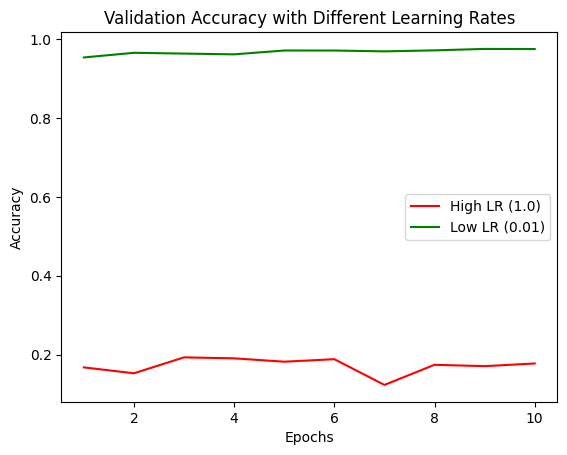

In [3]:
# - From Tuning key gradient descent parameters, Modify learning rates and check when model fails
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28)).astype("float32") / 255

# Î™®Îç∏ Ï†ïÏùò Ìï®Ïàò
def get_model(learning_rate):
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer=keras.optimizers.RMSprop(learning_rate),
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

# ÌïôÏäµÎ•† 1.0 Î™®Îç∏
model_high_lr = get_model(1.0)
history_high_lr = model_high_lr.fit(
    train_images, train_labels,
    epochs=10, batch_size=128, validation_split=0.2)

# ÌïôÏäµÎ•† 0.01 Î™®Îç∏
model_low_lr = get_model(0.01)
history_low_lr = model_low_lr.fit(
    train_images, train_labels,
    epochs=10, batch_size=128, validation_split=0.2)

# Í≤∞Í≥º ÏãúÍ∞ÅÌôî
epochs = range(1, 11)
val_acc_high = history_high_lr.history["val_accuracy"]
val_acc_low = history_low_lr.history["val_accuracy"]

plt.plot(epochs, val_acc_high, "r-", label="High LR (1.0)")
plt.plot(epochs, val_acc_low, "g-", label="Low LR (0.01)")
plt.title("Validation Accuracy with Different Learning Rates")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Epoch 1/20
375/375 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 4ms/step - accuracy: 0.7210 - loss: 1.0571 - val_accuracy: 0.9018 - val_loss: 0.3624
Epoch 2/20
375/375 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.8985 - loss: 0.3648 - val_accuracy: 0.9165 - val_loss: 0.3102
Epoch 3/20
375/375 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 4ms/step - accuracy: 0.9120 - loss: 0.3222 - val_accuracy: 0.9193 - val_loss: 0.2928
Epoch 4/20
375/375 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.9193 - loss: 0.2985 - val_accuracy: 0.9222 - val_loss: 0.2834
Epoch 5/20
375/375 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.9175 - loss: 0.2957 - val_accuracy: 0.9241 - val_loss: 0.2781
Epoch 6/20
375/375 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.9207 - loss: 0.2818 - val_accuracy: 0.9242 - val_loss:

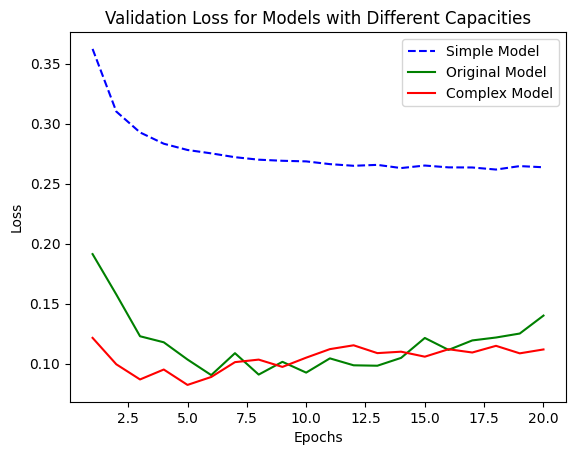

In [4]:
# - Visualize validation loss of the original model, model with lower capacity and model with larger capacity
# ÏÑ∏ Í∞ÄÏßÄ Î™®Îç∏(Í∞ÑÎã®Ìïú Î™®Îç∏, ÏõêÎûò Î™®Îç∏, Î≥µÏû°Ìïú Î™®Îç∏)Ïùò val loss ÎπÑÍµê
# Í∞ÑÎã®Ìïú Î™®Îç∏
simple_model = keras.Sequential([layers.Dense(10, activation="softmax")])
simple_model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history_simple = simple_model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_split=0.2)

# ÏõêÎûò Î™®Îç∏
original_model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax")
])
original_model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history_original = original_model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_split=0.2)

# Î≥µÏû°Ìïú Î™®Îç∏
complex_model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
complex_model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history_complex = complex_model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_split=0.2)

# Í≤∞Í≥º ÏãúÍ∞ÅÌôî
val_loss_simple = history_simple.history["val_loss"]
val_loss_original = history_original.history["val_loss"]
val_loss_complex = history_complex.history["val_loss"]

epochs = range(1, 21)
plt.plot(epochs, val_loss_simple, "b--", label="Simple Model")
plt.plot(epochs, val_loss_original, "g-", label="Original Model")
plt.plot(epochs, val_loss_complex, "r-", label="Complex Model")
plt.title("Validation Loss for Models with Different Capacities")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Epoch 1/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 82ms/step - accuracy: 0.6936 - loss: 0.5970 - val_accuracy: 0.8495 - val_loss: 0.4057
Epoch 2/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 35ms/step - accuracy: 0.8928 - loss: 0.3380 - val_accuracy: 0.8854 - val_loss: 0.3073
Epoch 3/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 26ms/step - accuracy: 0.9199 - loss: 0.2436 - val_accuracy: 0.8773 - val_loss: 0.3080
Epoch 4/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 22ms/step - accuracy: 0.9370 - loss: 0.1942 - val_accuracy: 0.8905 - val_loss: 0.2746
Epoch 5/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 24ms/step - accuracy: 0.9534 - loss: 0.1541 - val_accuracy: 0.8828 - val_loss: 0.2912
Epoch 6/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 22ms/step - accuracy: 0.9603 - loss: 0.1318 - val_accuracy: 0.8805 - val_loss: 0.304

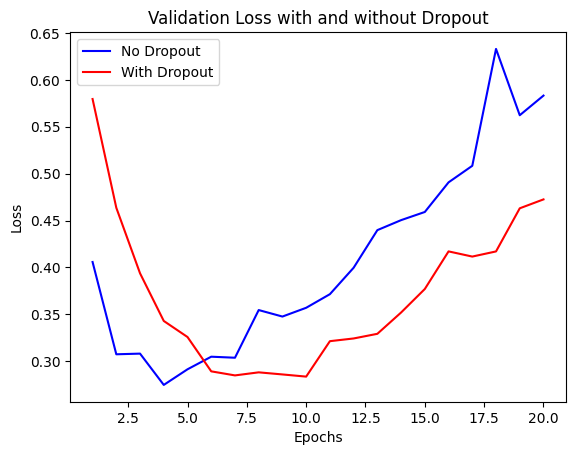

In [7]:
# - Visualize validation loss of the original model and model with dropout - ÎìúÎ°≠ÏïÑÏõÉ ÏóÜÎäî vs ÏûàÎäî
# ÎìúÎ°≠ÏïÑÏõÉ ÏóÜÎäî Î™®Îç∏
no_dropout_model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
no_dropout_model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
history_no_dropout = no_dropout_model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

# ÎìúÎ°≠ÏïÑÏõÉ Ï∂îÍ∞ÄÌïú Î™®Îç∏
dropout_model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
dropout_model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
history_dropout = dropout_model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

# Í≤∞Í≥º ÏãúÍ∞ÅÌôî
val_loss_no_dropout = history_no_dropout.history["val_loss"]
val_loss_dropout = history_dropout.history["val_loss"]

epochs = range(1, 21)
plt.plot(epochs, val_loss_no_dropout, "b-", label="No Dropout")
plt.plot(epochs, val_loss_dropout, "r-", label="With Dropout")
plt.title("Validation Loss with and without Dropout")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# ÏõêÎûò Î™®Îç∏: ÏóêÌè≠Ïù¥ ÎäòÏñ¥ÎÇ†ÏàòÎ°ù Í≥ºÏ†ÅÌï©Ïù¥ ÏßÑÌñâÎêòÎ©¥ÏÑú Í≤ÄÏ¶ù ÏÜêÏã§Ïù¥ Îã§Ïãú Ïò¨ÎùºÍ∞ê
# Dropout Ï†ÅÏö© Î™®Îç∏: ÏùºÎ∞òÌôî ÏÑ±Îä• Ïú†ÏßÄ ‚Üí val_loss Ï¶ùÍ∞Ä ÏñµÏ†ú

## Summary